/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mean Error Value 0.6267


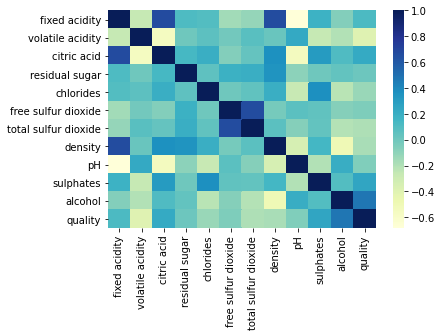

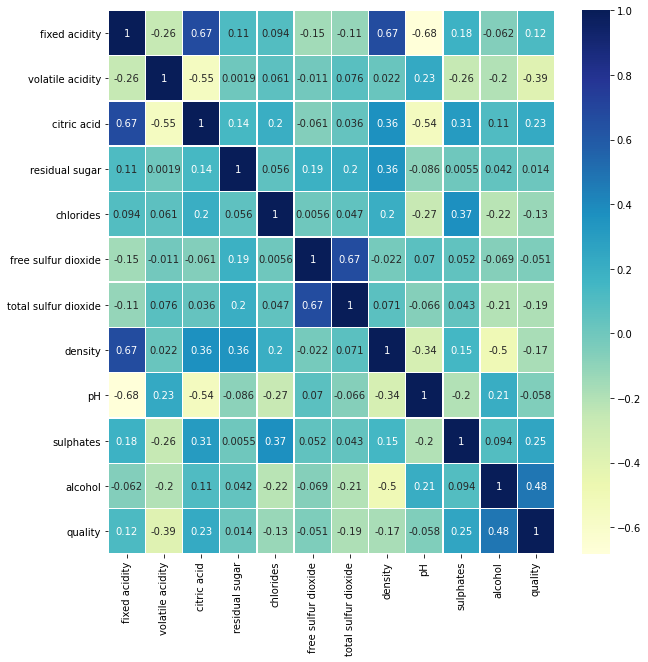

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as pl
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression

dataset = pd.read_csv('wine_dataset.csv')

corr_matrix = dataset.corr()
sns.heatmap(corr_matrix,cmap="YlGnBu")

fig, ax = pl.subplots(figsize=(10,10))
sns.heatmap(corr_matrix,cmap="YlGnBu", annot=True, linewidths=.5, ax = ax)

linear_dataset = dataset.drop(['fixed acidity','density','citric acid','free sulfur dioxide','total sulfur dioxide'],axis = 1,inplace=False)

X = linear_dataset.loc[:,'volatile acidity' : 'alcohol'].values
y = linear_dataset.loc[:, 'quality'].values

import statsmodels.api as sm
X_opt = X[:,0:6]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

X_opt = X[:,[0,2,3,4,5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

X_train,X_test,y_train,y_test = train_test_split(X_opt,y,test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

regressor = LinearRegression()
regressor.fit(X_train,y_train)

y_pred = regressor.predict(X_test)
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred))
print("Mean Error Value" ,round(rmse,4))